## Rough Work : Tube Assembly

### Step1. Load Libraries 

In [2]:
#load libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import glob as gl

from functools import reduce  # ask about this library

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Concatinating all tables in one big table 

In [15]:
# Read multiple files together and concatinating all fileds in to one file:

csv_files = gl.glob('*.csv')
print('Number of Files:','\n',len(csv_files),'\n''Filenames:','\n', csv_files)

df_data= []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_data.append(df)

df_full= pd.concat(df_data)


Number of Files: 
 21 
Filenames: 
 ['comp_threaded.csv', 'comp_adaptor.csv', 'tube_end_form.csv', 'comp_straight.csv', 'comp_tee.csv', 'comp_boss.csv', 'components.csv', 'comp_float.csv', 'bill_of_materials.csv', 'comp_elbow.csv', 'type_connection.csv', 'train_set.csv', 'comp_sleeve.csv', 'test_set.csv', 'tube.csv', 'comp_hfl.csv', 'type_end_form.csv', 'comp_other.csv', 'type_component.csv', 'specs.csv', 'comp_nut.csv']


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128215 entries, 0 to 64
Columns: 116 entries, adaptor_angle to weight
dtypes: float64(57), object(59)
memory usage: 114.4+ MB


In [5]:
df_full.head()

,adaptor_angle,annual_usage,base_diameter,base_type,bend_radius,blind_hole,bolt_pattern_long,bolt_pattern_wide,bracket_pricing,component_id,...,thread_size,thread_size_1,thread_size_2,thread_size_3,thread_size_4,tube_assembly_id,type,unique_feature,wall,weight
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0007,...,NaN,0.437,NaN,NaN,NaN,NaN,NaN,No,NaN,0.028
1,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,0.914
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0041,...,NaN,NaN,0.812,NaN,NaN,NaN,NaN,No,NaN,0.120
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0043,...,NaN,NaN,0.812,NaN,NaN,NaN,NaN,No,NaN,0.090
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0044,...,NaN,NaN,1.437,NaN,NaN,NaN,NaN,No,NaN,0.182


In [6]:
#head of BOM table
df_data[8].head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Melting BOM table
df_bom = df_data[8]
df_bom_melt= df_bom.melt(id_vars='tube_assembly_id',value_vars = ['component_id_1', 'component_id_2','component_id_3','component_id_4','component_id_5','component_id_6','component_id_7','component_id_8'],value_name='component_id')
df_bom_t = (df_bom_melt.merge(df_bom, how = 'inner', on = 'tube_assembly_id')).drop(columns= ['component_id_1', 'component_id_2','component_id_3','component_id_4','component_id_5','component_id_6','component_id_7','component_id_8'])
df_bom_t.head(10)

#df_bom_t.dropna(axis= 'columns', how = 'all')
#(df_bom_t[df_bom_t[3:].isnull()== True]).dropna(how = 'all' ,axis = 'columns')

,tube_assembly_id,variable,component_id,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8
0,TA-00001,component_id_1,C-1622,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00001,component_id_2,C-1629,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00001,component_id_3,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00001,component_id_4,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00001,component_id_5,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5,TA-00001,component_id_6,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,TA-00001,component_id_7,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
7,TA-00001,component_id_8,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,TA-00002,component_id_1,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TA-00002,component_id_2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#table showing quantity distribution
df_bom_t.iloc[0:, 3:].head()

,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8
0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


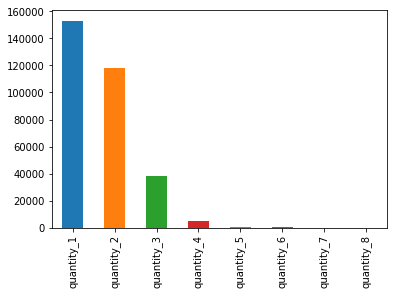

In [9]:
df_bom_t.iloc[0:, 3:].notnull().sum().plot(kind='bar')

### Observation: 

1.Shows quantity distribution of all eight components in descending order. 

2.Need to investigate why quantity distribution from 4 through to 8 is low. 

3.Is it due to cost of specialized manufacturing, supplier proximity, or used less in assembly. 

## Rough Work: What can we do with Component Tables

### Step2: Load Component Tables 

## Converting categorical values in to dummy variables

In [ ]:
#comes after Converting Data Types of Merged Columns
#Identify categorical columns:
df_third.select_dtypes(['category']).columns

In [ ]:
#Replace categorical values with dummy variables: To be done later

#df_third_dummy= pd.get_dummies(df_third[['supplier', 'component_id_1',
 #      'component_id_2', 'component_id_3', 'component_id_4', 'component_id_5',
 #      'component_id_6', 'component_id_7', 'component_id_8', 'material_id',
 #      'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x',
 #      'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8',
 #      'spec9', 'spec10', 'bracket_pricing']], drop_first= True)

# Concat dummy variables and keep converted columns for reference.
#df_third_final = pd.concat([df_third, df_third_dummy], axis = 1)#.drop(labels= ['bracket_pricing', 'supplier'], axis=1)

#Rename dummy column and store within merged table
#df_third_final= df_third_final.rename(index = str, columns= {'Yes': 'bulkprice'})

#df_third_final.head()



### 1.Can we merge multindex table df_prime_group with zero index table df_prime?

In [13]:
#from 963 after top 5 most expensive assemblies 
#Merge statistics measure to df_prime table:
df_prime = pd.merge(left=df_third, right= df_third_group, on=['tube_assembly_id','annual_usage','bracket_pricing'], how = 'inner')

#View Table df_prime: 
df_prime.head()

## Running for loop example: Thanks Harsh

In [ ]:
#Verify if quantity miss match is fixed
# Thanks to my mentor for walkig me through for loop. 
#I have used this concept to calculate sequential rebate in supplier pricing.

#for i in range(len(df_prime['quantity'])):
   #print(df_prime['quantity'].iloc[i])
    #print(df_prime['quantity'].iloc[i+1])
    #if df_prime['quantity'].iloc[i] < df_prime['quantity'].iloc[i+1]:
        #print((df_prime['cost'].iloc[i+1]-df_prime['cost'].iloc[i])/df_prime['cost'].iloc[i] * 100)
    #else:
        #print (0)

### b) %Unit Cost Rebate for group 1-2, 1-5, 1-10 etc

### Option a) Using lambda expression: 

In [734]:
df_prime['%unit_rebate']=df_prime.groupby(['tube_assembly_id', 'quantity','cost'][0])['cost'].apply(lambda x: (x-x.max())/x.max()* 100)
df_prime.head()

,tube_assembly_id,supplier,bracket_pricing,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,...,annual_usage,min_order_quantity,quantity,cost,avg_price,max_price,min_price,std_price,%sequential_rebate,%unit_rebate
0,TA-00002,S-0066,Yes,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,21.905933,7.298036,21.905933,2.99906,6.687727,0.000000,0.000000
1,TA-00002,S-0066,Yes,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,2,12.341214,7.298036,21.905933,2.99906,6.687727,-43.662687,-43.662687
2,TA-00002,S-0066,Yes,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,5,6.601826,7.298036,21.905933,2.99906,6.687727,-46.505861,-69.862840
3,TA-00002,S-0066,Yes,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,10,4.687770,7.298036,21.905933,2.99906,6.687727,-28.992836,-78.600457
4,TA-00002,S-0066,Yes,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,25,3.541561,7.298036,21.905933,2.99906,6.687727,-24.451039,-83.832868


### Option b) Using for loop: (Getting Error)

In [735]:
#Try1: 
#rebate1 = []
#for i in range(len(df_prime['cost'])):
    #if ((df_prime['quantity'].iloc[i-1] < df_prime['quantity'].iloc[i]) & (df_prime['tube_assembly_id'].iloc[i]==df_prime['tube_assembly_id'].iloc[i-1])): 
        #rebate1.append((df_prime['cost'].iloc[i].max()-df_prime['cost'].iloc[0])/df_prime['cost'].iloc[0].max())
    #else:
        #rebate1.append(0)
#df_prime['%rebate1'] =rebate1
#df_prime

#Try2
#rebate = []
#for i in range(len(df_prime['quantity'])):
    #if ((df_prime['quantity'].iloc[i-1] < df_prime['quantity'].iloc[i]) & (df_prime['tube_assembly_id'].iloc[i]==df_prime['tube_assembly_id'].iloc[i-1])): 
        #rebate.append((df_prime['cost'].iloc[i]-df_prime['cost'].iloc[0])/df_prime['cost'].iloc[0])
    #else:
        #rebate.append(0)
#print(j,i)

#Try3: 
# % Total cost of an assembly by quantity:
#df_cost=df_prime.groupby('tube_assembly_id').apply(lambda x: (x.cost/x.cost.cumsum()* 100)).reset_index().drop('level_1', axis=1)#,  x['quantity']* x['cost'])
#df_cost.columns = ['tube_assembly_id', '%total_cost']
#df_cost['%rebate'] = 100 - df_cost['%total_cost']
#df_cost

## After Verify quantity miss-match:

In [ ]:
#(df_prime[(df_prime['quantity']!= df_prime['min_order_quantity']) & (df_prime['min_order_quantity'] !=0)]) = (df_prime[(df_prime['quantity']!= (df_prime['min_order_quantity']) & (df_prime['min_order_quantity'] !=0))]).assign(quantity = df_prime['min_order_quantity'])
#df_prime['quantity'].sum()

In [18]:
#1.Component
df_comp = pd.read_csv('components.csv')

#2.Adaptor
df_ada = pd.read_csv('comp_adaptor.csv')

#3.Boss
df_bos = pd.read_csv('comp_boss.csv')

#4. Elbow
df_elb = pd.read_csv('comp_elbow.csv')

#5. Float
df_flt = pd.read_csv('comp_float.csv')

#6. HFL
df_hfl = pd.read_csv('comp_hfl.csv')

#7. Nut
df_nut = pd.read_csv('comp_nut.csv')

#8. Other
df_oth = pd.read_csv('comp_other.csv')

#9. Sleeve
df_slv = pd.read_csv('comp_sleeve.csv')

#10. Straight
df_str = pd.read_csv('comp_straight.csv')

#11. Tee
df_tee = pd.read_csv('comp_tee.csv')

#12. Threaded
df_thr = pd.read_csv('comp_threaded.csv')

#12 End-Form: 
df_end = pd.read_csv('tube_end_form.csv')

In [19]:
#Problem: How to merge this table with df_11 as reference id's don't match? 
print(df_end.head())
print(df_thr[['end_form_id_1', 'end_form_id_2', 'end_form_id_3', 'end_form_id_4']].head())
print(df_ada[['end_form_id_1', 'end_form_id_2']].head())

  end_form_id forming
0      EF-001     Yes
1      EF-002      No
2      EF-003      No
3      EF-004      No
4      EF-005     Yes
  end_form_id_1 end_form_id_2 end_form_id_3 end_form_id_4
0         A-001         A-004           NaN           NaN
1         A-003         A-003           NaN           NaN
2         A-004         A-001           NaN           NaN
3         A-003         A-001           NaN           NaN
4         A-004         A-001           NaN           NaN
  end_form_id_1 end_form_id_2
0         A-001         A-001
1         A-001         A-001
2         A-007         A-001
3         A-007         A-001
4         A-001         A-007


### Step3: Merge Component Tables along component_id as secondary key

In [20]:
# Merge 1: df_comp & df_ada
# Common Labels: component_id, component_type_id 

df_1 = pd.merge(left = df_comp, right= df_ada, on = ['component_id', 'component_type_id'], how = 'left')

#Merge 2: df_1 & df_bos
#Common Labels: component_id, component_type_id, 
#Different Label common fields: connection_type_id, connection_type_id_1, connection_type_id_2

# Merging 2 on common lables for now: 
df_2 = pd.merge(left = df_1 , right = df_bos, on = ['component_id','component_type_id', 'unique_feature', 'orientation'], how = 'left')


#Merge3: df_2 and df_elb
#Common Labels: component_id, component_type_id

df_3 = pd.merge(left = df_2 , right = df_elb, on = ['component_id','component_type_id'], how = 'left')

#Merge 4: 
#Common Labels: component_id, component_type_id
df_4 = pd.merge(left = df_3 , right = df_flt, on = ['component_id','component_type_id'], how = 'left')

#Merge 5: 
#Common Labels: component_id, component_type_id
df_5 = pd.merge(left = df_4 , right = df_hfl, on = ['component_id','component_type_id'], how = 'left')

#Merge 6: 
#Common Labels: component_id, component_type_id
df_6 = pd.merge(left = df_5 , right = df_nut, on = ['component_id','component_type_id'], how = 'left')

#Merge 7: 
#Common Labels: component_id
df_7 = pd.merge(left = df_6 , right = df_oth, on = ['component_id'], how = 'left')

#Merge 8: 
#Common Labels: component_id, component_type_id, connection_type_id
df_8 = pd.merge(left = df_7 , right = df_slv, on = ['component_id','component_type_id', 'connection_type_id'], how = 'left')

#Merge 9: 
#Common Labels: component_id, component_type_id
df_9 = pd.merge(left = df_8 , right = df_str, on = ['component_id','component_type_id','mj_class_code'], how = 'left')

#Merge 10: 
#Common Labels: component_id, component_type_id
df_10 = pd.merge(left = df_9 , right = df_tee, on = ['component_id','component_type_id', 'mj_class_code', 'mj_plug_class_code'], how = 'left')

#Merge 11: 
#Common Labels: component_id, component_type_id, end_form_id_1, end_form_id_2
df_11 = pd.merge(left = df_10 , right = df_thr, on = ['component_id','component_type_id','end_form_id_1', 'end_form_id_2', 'connection_type_id_1','connection_type_id_2'], how = 'left')

In [21]:
df_11[['component_id', 'name', 'component_type_id', 'end_form_id_1',
       'connection_type_id_1', 'end_form_id_2', 'connection_type_id_2',
       'unique_feature_x', 'orientation_x', 'type', 'connection_type_id',
       'outside_shape', 'base_type', 'groove_x', 'unique_feature_y',
       'orientation_y', 'mj_class_code', 'mj_plug_class_code', 'groove_y',
       'unique_feature_x', 'orientation_x', 'orientation_y',
       'corresponding_shell', 'coupling_class', 'material', 'plating_x',
       'orientation_x', 'thread_size', 'blind_hole', 'orientation_y',
       'part_name', 'unique_feature_y', 'plating_y', 'orientation_x',
       'groove_x', 'unique_feature_x', 'orientation_y', 'groove_y',
       'unique_feature_y', 'orientation_x', 'nominal_size_1_y',
       'end_form_id_3', 'connection_type_id_3', 'end_form_id_4',
       'connection_type_id_4', 'unique_feature', 'orientation_y']]

KeyError: "['unique_feature'] not in index"

### Step4: Pre-process data and clean merged table

In [22]:
#Initial Merged Table Data Type: 
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Columns: 121 entries, component_id to weight
dtypes: float64(76), object(45)
memory usage: 1.9+ MB


In [23]:
#Convert Object to Categories
df_11[df_11.select_dtypes(['object']).columns] = df_11.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [24]:
#Final Merged Table Data Type:  
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Columns: 121 entries, component_id to weight
dtypes: category(27), float64(76), object(18)
memory usage: 1.7+ MB


In [25]:
df_11.select_dtypes(['category', 'object']).columns

Index(['component_id', 'name', 'component_type_id', 'end_form_id_1',
       'connection_type_id_1', 'end_form_id_2', 'connection_type_id_2',
       'unique_feature_x', 'orientation_x', 'type', 'connection_type_id',
       'outside_shape', 'base_type', 'groove_x', 'mj_class_code',
       'mj_plug_class_code', 'groove_y', 'unique_feature_y', 'orientation_y',
       'orientation_x', 'corresponding_shell', 'coupling_class', 'material',
       'plating_x', 'orientation_y', 'thread_size', 'blind_hole',
       'orientation_x', 'part_name', 'unique_feature_x', 'plating_y',
       'orientation_y', 'groove_x', 'unique_feature_y', 'orientation_x',
       'groove_y', 'unique_feature_x', 'orientation_y', 'nominal_size_1_y',
       'end_form_id_3', 'connection_type_id_3', 'end_form_id_4',
       'connection_type_id_4', 'unique_feature_y', 'orientation'],
      dtype='object')

In [26]:
df_11[['unique_feature_x', 'orientation_x', 'groove_x', 'unique_feature_y',
       'orientation_y', 'groove_y', 'unique_feature_x', 'orientation_x',
       'orientation_y', 'orientation_x', 'orientation_y', 'unique_feature_y',
       'orientation_x', 'groove_x', 'unique_feature_x', 'orientation_y',
       'groove_y', 'unique_feature_y', 'orientation_x', 'orientation_y']].head()

,unique_feature_x,unique_feature_x,unique_feature_x,orientation_x,orientation_x,orientation_x,orientation_x,groove_x,groove_x,unique_feature_y,...,unique_feature_y,unique_feature_y,orientation_x,orientation_x,orientation_x,orientation_x,orientation_y,orientation_y,orientation_y,orientation_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [27]:
df_11[['component_id', 'name', 'component_type_id', 'end_form_id_1_x',
       'connection_type_id_1_x', 'end_form_id_2_x', 'connection_type_id_2_x',
       'type', 'connection_type_id_x', 'outside_shape', 'base_type',
       'mj_class_code_x', 'mj_plug_class_code_x', 'corresponding_shell',
       'coupling_class', 'material', 'plating_x', 'thread_size', 'blind_hole',
       'part_name', 'connection_type_id_y', 'plating_y', 'mj_class_code_y',
       'mj_class_code', 'mj_plug_class_code_y', 'end_form_id_1_y',
       'connection_type_id_1_y', 'nominal_size_1_y', 'end_form_id_2_y',
       'connection_type_id_2_y', 'end_form_id_3', 'connection_type_id_3',
       'end_form_id_4', 'connection_type_id_4', 'unique_feature']]

KeyError: "['end_form_id_1_x' 'connection_type_id_1_x' 'end_form_id_2_x'\n 'connection_type_id_2_x' 'connection_type_id_x' 'mj_class_code_x'\n 'mj_plug_class_code_x' 'connection_type_id_y' 'mj_class_code_y'\n 'mj_plug_class_code_y' 'end_form_id_1_y' 'connection_type_id_1_y'\n 'end_form_id_2_y' 'connection_type_id_2_y' 'unique_feature'] not in index"

## How to use these tables? 

In [28]:
df_comp_type = pd.read_csv('type_component.csv', index_col='component_type_id')
df_connection_type = pd.read_csv('type_connection.csv', index_col='connection_type_id')
df_end_type = pd.read_csv('type_end_form.csv', index_col='end_form_id')
df_end_form = pd.read_csv('tube_end_form.csv', index_col='end_form_id')

In [29]:
df_end_form.head()

,forming
end_form_id,
EF-001,Yes
EF-002,No
EF-003,No
EF-004,No
EF-005,Yes


In [30]:
df_end_type.head()

,name
end_form_id,
A-001,Male (Stud)
A-002,Male (Swivel)
A-003,Braze-Weld Boss
A-004,Braze-Weld Socket
A-005,Swivel Nut


In [31]:
df_comp_type.head()

,name
component_type_id,
CP-001,4-bolt Tig Straight
CP-002,4-bolt MJ Straight
CP-003,4-bolt Braze/Weld Straight
CP-004,2-bolt Braze/Weld Straight
CP-005,2-bolt MJ Straight


In [ ]:
#New components merge: This is working but result is differnt.
#fors ome reason nominal_size_1 is giving error in the last table merge. 

#Merging common columns using left join.
#Merge 1: Components with Adaptor
print('Common Columns for 1st Merge:''\n',(df_comps[0].columns) & (df_comps[1].columns)),print('\n')
df_0_1  = pd.merge(left= df_comps[0], right=df_comps[1],
                   on = ['component_id', 'component_type_id'], how = 'left')
#Merge 2: df_0_1 with Boss
print('Common Columns for 2nd Merge:''\n',(df_0_1.columns) & (df_comps[2].columns)),print('\n')
df_0_2  = pd.merge(left = df_0_1, right = df_comps[2],
                   on = ['component_id', 'component_type_id','unique_feature', 'orientation'], how = 'left')
#Merge 3: df_0_2 with Elbow
print('Common Columns for 3rd Merge:''\n',(df_0_2.columns) & (df_comps[3].columns)),print('\n')
df_0_3  = pd.merge(left = df_0_2, right= df_comps[3],
                   on = ['component_id', 'component_type_id', 'overall_length', 'unique_feature',
       'orientation', 'bolt_pattern_long', 'bolt_pattern_wide', 'groove'], how = 'left')
#Merge 4: df_0_3 with Float
print('Common Columns for 4rd Merge:''\n',(df_0_3.columns) & (df_comps[4].columns)),print('\n')
df_0_4  = pd.merge(left = df_0_3, right= df_comps[4],
                   on = ['component_id', 'component_type_id', 'orientation', 'bolt_pattern_long',
       'bolt_pattern_wide', 'thickness', 'weight'], how = 'left')
#Merge5: df_0_4 with HFL
print('Common Columns for 5th Merge:''\n',(df_0_4.columns) & (df_comps[5].columns)),print('\n')
df_0_5  = pd.merge(left = df_0_4, right= df_comps[5],
                   on = ['component_id', 'component_type_id', 'orientation', 'weight'], how = 'left')
#Merge 6: df_0_5 with Nut
print('Common Columns for 6th Merge:''\n',(df_0_5.columns) & (df_comps[6].columns)),print('\n')
df_0_6  = pd.merge(left = df_0_5, right= df_comps[6],
                   on = ['component_id', 'component_type_id', 'orientation', 'weight'], how = 'left')
#Merge 7: df_0_6 with Other
print('Common Columns for 7th Merge:''\n',(df_0_6.columns) & (df_comps[7].columns)),print('\n')
df_0_7  = pd.merge(left = df_0_6, right= df_comps[7],
                   on = ['component_id', 'weight'], how = 'left')
#Merge 8: df_0_7 with Sleeve
print('Common Columns for 8th Merge:''\n',(df_0_7.columns) & (df_comps[8].columns)),print('\n')
df_0_8  = pd.merge(left = df_0_7, right= df_comps[8],
                   on = ['component_id', 'component_type_id', 'unique_feature', 'orientation',
       'connection_type_id', 'weight', 'plating', 'length' ], how = 'left')
#Merge 9: df_0_8 with Straight
print('Common Columns for 9th Merge:''\n',(df_0_8.columns) & (df_comps[9].columns)),print('\n')
df_0_9  = pd.merge(left = df_0_8, right= df_comps[9],
                   on = ['component_id', 'component_type_id', 'overall_length', 'unique_feature',
       'orientation', 'bolt_pattern_long', 'bolt_pattern_wide', 'groove',
       'thickness', 'mj_class_code', 'weight'], how = 'left')
#Merge 10: df_0_9 with Tee
print('Common Columns for 10th Merge:''\n',(df_0_9.columns) & (df_comps[10].columns)),print('\n')
df_0_10 = pd.merge(left = df_0_9, right= df_comps[10],
                   on = ['component_id', 'component_type_id', 'overall_length', 'unique_feature',
       'orientation', 'bolt_pattern_long', 'bolt_pattern_wide', 'groove',
       'extension_length', 'thickness', 'drop_length', 'mj_class_code',
       'mj_plug_class_code', 'weight'], how = 'left')
#Merge 11: df_0_10 with Threaded
print('Common Columns for 11th Merge:''\n',(df_0_10.columns) & (df_comps[11].columns)),print('\n')
df_0_11 = pd.merge(left = df_0_10, right= df_comps[11],
                   on = ['component_id', 'component_type_id', 'adaptor_angle', 'overall_length','end_form_id_1',
                         'connection_type_id_1','length_1', 'thread_size_1','thread_pitch_1','hex_size',
                         'length_2', 'thread_size_2', 'thread_pitch_2','nominal_size_2','end_form_id_2',
                         'connection_type_id_2', 'unique_feature', 'orientation', 'weight'], how = 'left')



## 2. Approach: Build Secondary Table by merging component columns along common categorical values using left join (rejected)

### Step2: Load Component Tables and Merge on common columns

In [21]:
#load component tables and merge along seconday key component_id 
tables = ['components.csv',
          'comp_adaptor.csv',
          'comp_boss.csv', 
          'comp_elbow.csv',
          'comp_float.csv', 
          'comp_hfl.csv', 
          'comp_nut.csv', 
          'comp_other.csv', 
          'comp_sleeve.csv', 
          'comp_straight.csv', 
          'comp_tee.csv', 
          'comp_threaded.csv']

df_comps = [pd.read_csv(table) for table in tables]

In [22]:
df_comps[1].head()

,component_id,component_type_id,adaptor_angle,overall_length,end_form_id_1,connection_type_id_1,length_1,thread_size_1,thread_pitch_1,nominal_size_1,end_form_id_2,connection_type_id_2,length_2,thread_size_2,thread_pitch_2,nominal_size_2,hex_size,unique_feature,orientation,weight
0,C-0005,CP-028,NaN,58.4,A-001,B-001,NaN,1.312,12.0,NaN,A-001,B-004,NaN,1.000,11.5,NaN,34.93,No,No,0.206
1,C-0006,CP-028,NaN,34.8,A-001,B-001,NaN,0.437,20.0,NaN,A-001,B-005,NaN,0.750,16.0,NaN,22.20,No,No,0.083
2,C-1435,CP-028,NaN,20.3,A-007,B-004,NaN,NaN,NaN,15.88,A-001,B-007,NaN,0.875,18.0,NaN,22.22,No,No,0.023
3,C-1546,CP-028,NaN,26.4,A-007,B-004,NaN,0.125,27.0,NaN,A-001,B-004,NaN,0.125,27.0,NaN,15.88,No,No,0.026
4,C-1583,CP-028,NaN,44.5,A-001,B-005,NaN,1.312,12.0,NaN,A-007,B-005,NaN,1.062,12.0,NaN,38.10,No,No,0.256


In [23]:
#Merging common columns using left join.
#Merge 1: Components with Adaptor
print('Common Columns for 1st Merge:''\n',(df_comps[0].columns) & (df_comps[1].columns)),print('\n')
df_0_1  = pd.merge(left= df_comps[0], right=df_comps[1],
                   on = ['component_id', 'component_type_id'], how = 'left')
#Merge 2: df_0_1 with Boss
print('Common Columns for 2nd Merge:''\n',(df_0_1.columns) & (df_comps[2].columns)),print('\n')
df_0_2  = pd.merge(left = df_0_1, right = df_comps[2],
                   on = ['component_id', 'component_type_id','unique_feature', 'orientation'], how = 'left')
#Merge 3: df_0_2 with Elbow
print('Common Columns for 3rd Merge:''\n',(df_0_2.columns) & (df_comps[3].columns)),print('\n')
df_0_3  = pd.merge(left = df_0_2, right= df_comps[3],
                   on = ['component_id', 'component_type_id','unique_feature', 'orientation', 'groove'], how = 'left')
#Merge 4: df_0_3 with Float
print('Common Columns for 4rd Merge:''\n',(df_0_3.columns) & (df_comps[4].columns)),print('\n')
df_0_4  = pd.merge(left = df_0_3, right= df_comps[4],
                   on = ['component_id', 'component_type_id', 'orientation'], how = 'left')
#Merge5: df_0_4 with HFL
print('Common Columns for 5th Merge:''\n',(df_0_4.columns) & (df_comps[5].columns)),print('\n')
df_0_5  = pd.merge(left = df_0_4, right= df_comps[5],
                   on = ['component_id', 'component_type_id','orientation'], how = 'left')
#Merge 6: df_0_5 with Nut
print('Common Columns for 6th Merge:''\n',(df_0_5.columns) & (df_comps[6].columns)),print('\n')
df_0_6  = pd.merge(left = df_0_5, right= df_comps[6],
                   on = ['component_id', 'component_type_id', 'orientation'], how = 'left')
#Merge 7: df_0_6 with Other
print('Common Columns for 7th Merge:''\n',(df_0_6.columns) & (df_comps[7].columns)),print('\n')
df_0_7  = pd.merge(left = df_0_6, right= df_comps[7],
                   on = ['component_id'], how = 'left')
#Merge 8: df_0_7 with Sleeve
print('Common Columns for 8th Merge:''\n',(df_0_7.columns) & (df_comps[8].columns)),print('\n')
df_0_8  = pd.merge(left = df_0_7, right= df_comps[8],
                   on = ['component_id', 'component_type_id','unique_feature', 'orientation','connection_type_id', 'plating' ], how = 'left')
#Merge 9: df_0_8 with Straight
print('Common Columns for 9th Merge:''\n',(df_0_8.columns) & (df_comps[9].columns)),print('\n')
df_0_9  = pd.merge(left = df_0_8, right= df_comps[9],
                   on = ['component_id', 'component_type_id','unique_feature', 'orientation','groove', 'mj_class_code'], how = 'left')
#Merge 10: df_0_9 with Tee
print('Common Columns for 10th Merge:''\n',(df_0_9.columns) & (df_comps[10].columns)),print('\n')
df_0_10 = pd.merge(left = df_0_9, right= df_comps[10],
                   on = ['component_id', 'component_type_id', 'unique_feature', 'orientation','groove', 'mj_class_code','mj_plug_class_code'], how = 'left')
#Merge 11: df_0_10 with Threaded
print('Common Columns for 11th Merge:''\n',(df_0_10.columns) & (df_comps[11].columns)),print('\n')
df_0_11 = pd.merge(left = df_0_10, right= df_comps[11],
                   on = ['component_id', 'component_type_id', 'end_form_id_1','connection_type_id_1', 'end_form_id_2', 'connection_type_id_2', 'unique_feature', 'orientation'], how = 'left')

Common Columns for 1st Merge:
 Index(['component_id', 'component_type_id'], dtype='object')


Common Columns for 2nd Merge:
 Index(['component_id', 'component_type_id', 'unique_feature', 'orientation',
       'weight'],
      dtype='object')


Common Columns for 3rd Merge:
 Index(['component_id', 'component_type_id', 'overall_length', 'unique_feature',
       'orientation', 'bolt_pattern_long', 'bolt_pattern_wide', 'groove'],
      dtype='object')


Common Columns for 4rd Merge:
 Index(['component_id', 'component_type_id', 'orientation', 'thickness',
       'weight'],
      dtype='object')


Common Columns for 5th Merge:
 Index(['component_id', 'component_type_id', 'orientation'], dtype='object')


Common Columns for 6th Merge:
 Index(['component_id', 'component_type_id', 'orientation', 'weight'], dtype='object')


Common Columns for 7th Merge:
 Index(['component_id'], dtype='object')


Common Columns for 8th Merge:
 Index(['component_id', 'component_type_id', 'unique_feature', 'orient

In [24]:
#Final Components Table: 
df_0_11.head(5)

,component_id,name,component_type_id,adaptor_angle_x,overall_length_x,end_form_id_1,connection_type_id_1,length_1_x,thread_size_1_x,thread_pitch_1_x,...,thread_size_3,thread_pitch_3,nominal_size_3,end_form_id_4,connection_type_id_4,length_4,thread_size_4,thread_pitch_4,nominal_size_4,weight
0,9999,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-0001,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C-0002,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-0003,SLEEVE-FLARED,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-0004,NUT,CP-026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Parking lot Item: Adding end type and end form in the final components table accounted for all null values: 


In [25]:
#Load End-Form table: 
df_end = pd.read_csv('tube_end_form.csv')

In [26]:
#Problem: How to merge this table with df_11 as reference id's don't match? 
print(df_end.head())
print(df_comps[11][['end_form_id_1', 'end_form_id_2', 'end_form_id_3', 'end_form_id_4']].head())
print(df_comps[1][['end_form_id_1', 'end_form_id_2']].head())

  end_form_id forming
0      EF-001     Yes
1      EF-002      No
2      EF-003      No
3      EF-004      No
4      EF-005     Yes
  end_form_id_1 end_form_id_2 end_form_id_3 end_form_id_4
0         A-001         A-004           NaN           NaN
1         A-003         A-003           NaN           NaN
2         A-004         A-001           NaN           NaN
3         A-003         A-001           NaN           NaN
4         A-004         A-001           NaN           NaN
  end_form_id_1 end_form_id_2
0         A-001         A-001
1         A-001         A-001
2         A-007         A-001
3         A-007         A-001
4         A-001         A-007


### Step4: Pre-process data and clean merged tables

In [27]:
#Initial Merged Table Data Type: 
df_0_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Columns: 104 entries, component_id to weight
dtypes: float64(76), object(28)
memory usage: 1.6+ MB


In [28]:
#Convert Object to Categories
df_0_11[df_0_11.select_dtypes(['object']).columns] = df_0_11.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [29]:
#Final Merged Table Data Type:  
df_0_11.info(max_cols=5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Columns: 104 entries, component_id to weight
dtypes: category(28), float64(76)
memory usage: 1.4 MB


In [30]:
df_0_11[df_0_11.select_dtypes(['category', 'object', 'float64']).columns].nunique()

component_id            2048
name                     297
component_type_id         29
adaptor_angle_x            1
overall_length_x          21
overall_length_x           0
end_form_id_1              4
connection_type_id_1       5
length_1_x                 1
thread_size_1_x            9
thread_pitch_1_x           8
nominal_size_1_x           8
end_form_id_2              4
connection_type_id_2       5
length_2_x                 1
thread_size_2_x           14
thread_pitch_2_x          10
nominal_size_2_x           1
hex_size_x                15
unique_feature             2
orientation                2
weight_x                  17
weight_x                   0
weight_x                   0
weight_x                 593
weight_x                   0
type                       0
connection_type_id         0
outside_shape              0
base_type                  0
                        ... 
drop_length_y              0
weight_y                   0
weight_y                   0
weight_y      

In [31]:
df_0_11.part_name.unique()

[NaN, NUT-FUEL TUBE, NUT, BLOCK, TUBE-LUBRICATION, ..., SCREW-BLEEDER, SCREEN AS, PIN-DOWEL, PLUG-STOR, NUT-FULL]
Length: 215
Categories (214, object): [NUT-FUEL TUBE, NUT, BLOCK, TUBE-LUBRICATION, ..., SCREEN AS, PIN-DOWEL, PLUG-STOR, NUT-FULL]

### Add types such as Component, Connection, End and End Form of Tube Assembly

In [32]:
# Load tables: 

df_comp_type = pd.read_csv('type_component.csv')
df_connection_type = pd.read_csv('type_connection.csv')
df_end_type = pd.read_csv('type_end_form.csv')
df_end_form = pd.read_csv('tube_end_form.csv')

In [33]:
#Common column between merged table and component type
df_0_11.columns & df_comp_type.columns

Index(['name', 'component_type_id'], dtype='object')

In [34]:
#Merged Table 1: 
df_0_11_1=pd.merge(left =df_0_11, right =df_comp_type , on =['component_type_id', 'name'], how = 'left')
df_0_11_1.head()

,component_id,name,component_type_id,adaptor_angle_x,overall_length_x,end_form_id_1,connection_type_id_1,length_1_x,thread_size_1_x,thread_pitch_1_x,...,thread_size_3,thread_pitch_3,nominal_size_3,end_form_id_4,connection_type_id_4,length_4,thread_size_4,thread_pitch_4,nominal_size_4,weight
0,9999,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-0001,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C-0002,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-0003,SLEEVE-FLARED,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-0004,NUT,CP-026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Common column between merged table 1 and connection type
df_0_11_1.columns & df_connection_type.columns

Index(['name', 'connection_type_id'], dtype='object')

In [36]:
#Merged Table 1 & 2: 
df_0_11_12=pd.merge(left =df_0_11_1, right =df_connection_type , on =['name', 'connection_type_id'], how = 'left')
df_0_11_12.head()

,component_id,name,component_type_id,adaptor_angle_x,overall_length_x,end_form_id_1,connection_type_id_1,length_1_x,thread_size_1_x,thread_pitch_1_x,...,thread_size_3,thread_pitch_3,nominal_size_3,end_form_id_4,connection_type_id_4,length_4,thread_size_4,thread_pitch_4,nominal_size_4,weight
0,9999,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-0001,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C-0002,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-0003,SLEEVE-FLARED,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-0004,NUT,CP-026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Common column between merged table 1& 2 and end type
df_0_11_12.columns & df_end_type.columns

Index(['name'], dtype='object')

In [38]:
#Merged Table 1,2,3 
df_0_11_123=pd.merge(left =df_0_11_12, right =df_end_type , on =['name'], how = 'left')
df_0_11_123.head()

,component_id,name,component_type_id,adaptor_angle_x,overall_length_x,end_form_id_1,connection_type_id_1,length_1_x,thread_size_1_x,thread_pitch_1_x,...,thread_pitch_3,nominal_size_3,end_form_id_4,connection_type_id_4,length_4,thread_size_4,thread_pitch_4,nominal_size_4,weight,end_form_id
0,9999,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-0001,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C-0002,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-0003,SLEEVE-FLARED,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-0004,NUT,CP-026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Common column between merged table 1,2,3 and end form
df_0_11_123.columns & df_end_form.columns

Index(['end_form_id'], dtype='object')

In [40]:
# #Merged Table 1,2,3 and end form: 
df_secnd=pd.merge(left =df_0_11_123, right =df_end_form , on =['end_form_id'], how = 'left')
df_secnd.head()

,component_id,name,component_type_id,adaptor_angle_x,overall_length_x,end_form_id_1,connection_type_id_1,length_1_x,thread_size_1_x,thread_pitch_1_x,...,nominal_size_3,end_form_id_4,connection_type_id_4,length_4,thread_size_4,thread_pitch_4,nominal_size_4,weight,end_form_id,forming
0,9999,OTHER,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-0001,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C-0002,SLEEVE,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-0003,SLEEVE-FLARED,CP-024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-0004,NUT,CP-026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_secnd.info(max_cols=5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Columns: 106 entries, component_id to forming
dtypes: category(25), float64(76), object(5)
memory usage: 1.4+ MB


In [42]:
df_secnd[df_secnd.select_dtypes(['category', 'object', 'float64']).columns].nunique()

component_id            2048
name                     297
component_type_id         29
adaptor_angle_x            1
overall_length_x          21
overall_length_x           0
end_form_id_1              4
connection_type_id_1       5
length_1_x                 1
thread_size_1_x            9
thread_pitch_1_x           8
nominal_size_1_x           8
end_form_id_2              4
connection_type_id_2       5
length_2_x                 1
thread_size_2_x           14
thread_pitch_2_x          10
nominal_size_2_x           1
hex_size_x                15
unique_feature             2
orientation                2
weight_x                  17
weight_x                   0
weight_x                   0
weight_x                 593
weight_x                   0
type                       0
connection_type_id         0
outside_shape              0
base_type                  0
                        ... 
weight_y                   0
weight_y                   0
weight_y                   0
weight_y      

### Observation:
1. Component types, connection type, end type and end form has no impact on merged tables. 
2. We haqve two table df_prime and df_secnd representing primary and secondary tables. 
3. Adding various types to component's table df_0_11 resulted in same unique count as df_secnd table.
4. So, was our approach to build secondary table using left merge effective? How to verify this finding?

In [48]:
df_secnd.describe()

,adaptor_angle_x,overall_length_x,length_1_x,thread_size_1_x,thread_pitch_1_x,nominal_size_1_x,length_2_x,thread_size_2_x,thread_pitch_2_x,nominal_size_2_x,...,nominal_size_2_y,length_3,thread_size_3,thread_pitch_3,nominal_size_3,length_4,thread_size_4,thread_pitch_4,nominal_size_4,weight
count,1.0,24.000000,1.0,17.000000,17.000000,8.000000,1.0,23.000000,23.000000,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,90.0,29.539167,65.5,0.687353,16.882353,9.922500,28.0,435.350391,451.717391,9.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,12.496236,NaN,0.423794,5.106765,5.548299,NaN,2084.802396,2081.240080,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,90.0,13.200000,65.5,0.125000,11.500000,3.180000,28.0,0.125000,11.500000,9.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,90.0,18.300000,65.5,0.375000,12.000000,5.952500,28.0,0.437500,15.000000,9.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,90.0,29.200000,65.5,0.750000,16.000000,8.730000,28.0,0.687000,18.000000,9.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,90.0,37.225000,65.5,1.000000,18.000000,13.495000,28.0,0.937500,19.000000,9.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,90.0,58.400000,65.5,1.312000,27.000000,19.050000,28.0,9999.000000,9999.000000,9.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_secnd.weight.unique()

array([nan])

In [50]:
columns_80= df_secnd.isnull().sum()/df_secnd.shape[0]* 100 < 80

df_secnd_1 = df_comps.loc[:,columns_80]
df_secnd_1.head()

AttributeError: 'list' object has no attribute 'loc'